In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import silhouette_samples,silhouette_score


#### ici nous allons importer la dataset depuis le lien sur kaggle
https://www.kaggle.com/ainslie/credit-card-data-clustering-analysis?select=CC+GENERAL.csv

In [2]:
import pandas as pd
df=pd.read_csv("assets/CC GENERAL.csv")
df.head(5)
df.shape

(8950, 18)

#### les données contiennent des valurs NaN il faut enlever ces valeurs avec la fct dropna()

In [3]:
df_new=df.dropna()
df_new.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [4]:
del df_new['CUST_ID']

In [5]:
#df_new.isnull()

### k-means sans normalisation

In [6]:
Cluster = KMeans(n_clusters=5)
Cluster.fit(df_new)
y_pred = Cluster.predict(df_new)

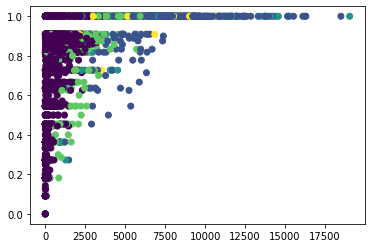

In [7]:
B=np.array(df_new)
plt.scatter(B[:, 0], B[:, 1], c=y_pred)
plt.show()

#### Pour que l'algorithme fonctionne bien il faut un préprocessing avant d'appliquer l'algorithme K-mean


In [8]:
def normalase(X):
    Min=np.min(X)
    Max=np.max(X)
    normalize=(X-Min)/(Max-Min)
    return normalize
Z=normalase(df_new)
Z.shape

(8636, 17)

In [9]:
Z.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.002148,0.818182,0.001945,0.000000,0.004240,0.000000,0.166667,0.000000,0.083333,0.000000,0.00000,0.005587,0.031720,0.003978,0.001826,0.000000,1.0
1,0.168169,0.909091,0.000000,0.000000,0.000000,0.136685,0.000000,0.000000,0.000000,0.166667,0.03252,0.000000,0.232053,0.080892,0.014034,0.222222,1.0
2,0.131026,1.000000,0.015766,0.018968,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.033520,0.248748,0.012263,0.008210,0.000000,1.0
4,0.042940,1.000000,0.000326,0.000393,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.00000,0.002793,0.038397,0.013373,0.003204,0.000000,1.0
5,0.095038,1.000000,0.027188,0.000000,0.059257,0.000000,0.666667,0.000000,0.583333,0.000000,0.00000,0.022346,0.058431,0.027602,0.031506,0.000000,1.0


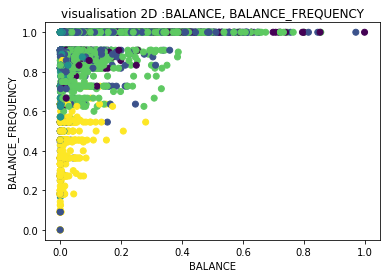

In [10]:

Cluster = KMeans(n_clusters=5)
Cluster.fit(Z)
y_pred = Cluster.predict(Z)
J=np.array(Z)
plt.scatter(J[:, 0], J[:, 1], c=y_pred)
plt.title('visualisation 2D :BALANCE, BALANCE_FREQUENCY')
plt.xlabel('BALANCE')
plt.ylabel('BALANCE_FREQUENCY')
plt.show()

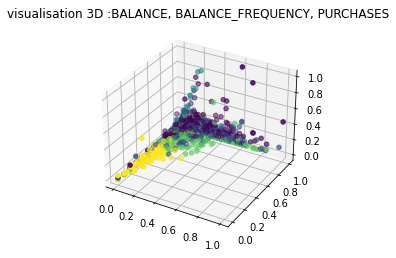

In [11]:
ax=plt.axes(projection='3d')
ax.scatter3D(J[:, 0], J[:, 1],J[:, 2],c=y_pred)
plt.title('visualisation 3D :BALANCE, BALANCE_FREQUENCY, PURCHASES')
plt.show()

####  malgé la normalisation de nos datasets nos cluster ne sont pas clairement montré pour cela nous allons appliqué l'algrithme de  réduction des dimentions PCA

###  PCA :  Réduction des dimensions

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(Z)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()
principalDf.shape

(8636, 2)

In [13]:
T=np.array(principalDf)
T

array([[-0.49204622, -0.10698665],
       [-0.62069095, -0.03013663],
       [ 0.29158121,  0.92292203],
       ...,
       [ 0.35722178, -0.39702329],
       [-0.65011311, -0.17049514],
       [-0.09625919,  0.4548037 ]])

###  WCSS (within-cluster sum of squares) permet de savoir k  

<function matplotlib.pyplot.show(close=None, block=None)>

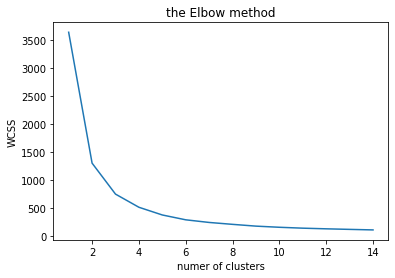

In [14]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(T)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,15),wcss)
plt.title('the Elbow method')
plt.xlabel('numer of clusters')
plt.ylabel('WCSS')
plt.show

#### Nous pouvons regarder le graphique ci-dessus et dire que nous avons besoin de 6 centroïdes pour faire le clustering K-means. Maintenant, utilisons la valeur 6 pour le nombre optimal de grappes et l'ajustement du modèle pour faire le clustering.

### K-means from scratch (2 variabes)

In [15]:
class K_Means:
    
    def __init__(self, k=6, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}
#initialiser les centroids
        for i in range(self.k):
            self.centroids[i] = data[i]
#les classes
        for i in range(self.max_iter):
            self.classifications = {}
#pour chaque classe elle a une liste des points
            for i in range(self.k):
                self.classifications[i] = []
               
#calculer la distance de chaque pt avec tous les centres et puis choisir le minimum de ces distances, l'index et 
# le pt correspondant à ce minimmum on les stockent dans classifications[index]et on aura une liste des listes des pts affecte à ses clasess
#[0.0, 0.5385164807134502, 0.509901951359278]
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                #print(distances)
                cluster = distances.index(min(distances))
                self.classifications[cluster].append(featureset)
            #ici on stock les anciens centres pour ne pas les perdres
            prev_centroids = dict(self.centroids)

            for cluster in self.classifications:
                #print(cluster) ici classification ie  0 ou 1 ou 2
                #calculer les moyens des centroids pour obtenir le nouveau centroid
                self.centroids[cluster] = np.average(self.classifications[cluster],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
 #condition d'arret: Stabilisation des centres de clusters (les centroids ne bougent plus lors des itérations)

                    #print(np.sum((current_centroid - original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        cluster = distances.index(min(distances))
        return cluster

In [16]:
model = K_Means()
model.fit(T)

In [35]:
y_pre=[]

for featureset in T:
    y_pre.append(model.predict(featureset))
y_pre=np.array(y_pre)
y_pre

array([1, 1, 2, ..., 4, 1, 3])

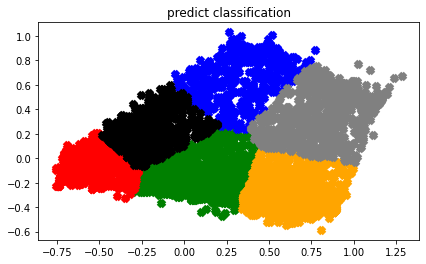

In [36]:
plt.figure(figsize=(15,4))

plt.subplot(122)
colors=['green','red','blue','black','orange','grey']
for centroid in model.centroids:
    plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],
                marker="o", color="b",linewidths=0.5)
for cluster in model.classifications:
    color = colors[cluster]
    for featureset in model.classifications[cluster]:
        
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, linewidths=5)
plt.title('predict classification')

plt.show()

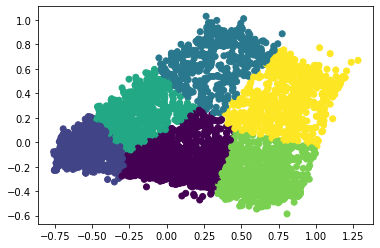

In [18]:

plt.scatter(T[:, 0], T[:, 1], c=y_pre)

###   K-means à l'aide de la biblio (2 variables)


array([4, 4, 2, ..., 3, 4, 0])

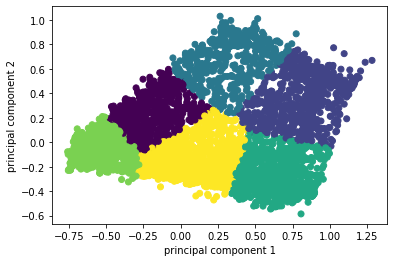

In [20]:
Cluster = KMeans(n_clusters=6)
Cluster.fit(T)
y_pred = Cluster.predict(T)

plt.scatter(T[:, 0], T[:, 1], c=y_pred)

plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

y_pred

### Analyse des comportements
Après avoir appliqué l’algorithme de clustering à notre dataset, le problème qui se pose, comment interpréter ces résultats en utilisant seulement 2 variables ? C’est vrai que le PCA facilite la visualisation de nos clusters mais nous avons décidé d’exploiter nos données différemment et de faire un retour en arrière pour l’analyse c'est-à-dire fusionner les données d’origine avec ses propres clusters, le tableau ci-dessous montre le résultat.
ici nous allons utilisé les résultats prédiction de k-means from scratch


In [26]:
df_new['Cluster']=pd.DataFrame(y_pre)
print()
df_new.head()


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,2.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,0.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,5.0


In [27]:
new_df=df_new
new_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.000000,6,NaN
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,NaN
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,NaN
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,NaN


In [28]:
new_df.shape

(8636, 18)

#### Maintenant nous avons notre propre dataset avec leurs cluster, passons maintenant à l'etape d'analyse 

Text(0.5, 1.0, 'Nombre de personnes / Cluster')

<Figure size 720x432 with 0 Axes>

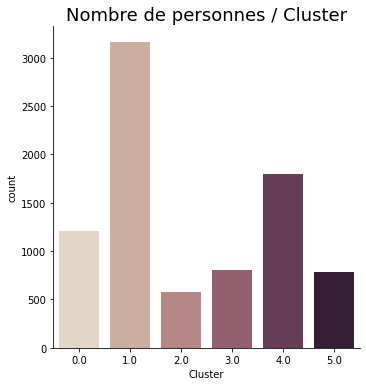

In [29]:
plt.figure(figsize=(10,6))
sns.catplot(x="Cluster", kind="count", palette="ch:.25", data=new_df)
plt.title("Nombre de personnes / Cluster", size=18)

Text(0.5, 1.0, 'Payments / Cluster')

<Figure size 720x432 with 0 Axes>

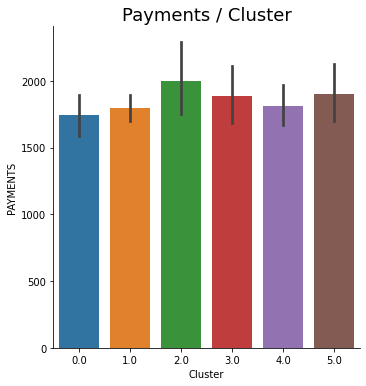

In [30]:
plt.figure(figsize=(10,6))
sns.catplot(x="Cluster", y="PAYMENTS",kind="bar",  data=new_df)
plt.title("Payments / Cluster", size=18)

In [31]:
def call_mean(group):
    avg=np.nanmean(group['PAYMENTS'])
    return avg
new_df.groupby('Cluster').apply(call_mean)


Cluster
0.0    1741.577618
1.0    1795.232521
2.0    1999.455532
3.0    1884.122214
4.0    1813.049958
5.0    1900.573634
dtype: float64

### les gens qui paient le plus sont les gens qui ont le credit limit le plus élevé 

Text(0.5, 1.0, 'CREDIT_LIMIT vs Payments / Cluster')

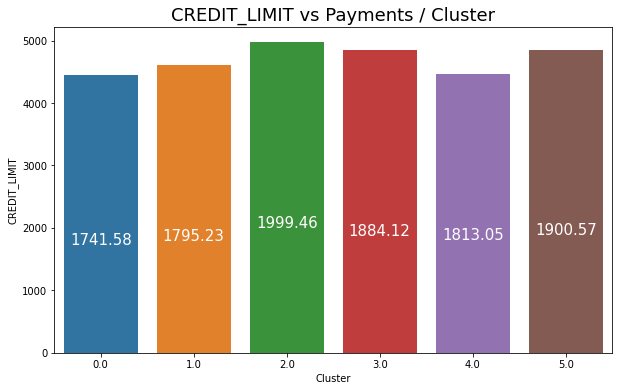

In [32]:
plt.figure(figsize=(10,6))

bar=sns.barplot( x='Cluster', y="CREDIT_LIMIT", data=new_df, ci=False)
cluster=new_df.groupby('Cluster').apply(call_mean)
cluster

for i in range(len(cluster)):
    bar.text(i,cluster[i],str(round(cluster[i],2)),fontdict=dict(color='white',fontsize=15),horizontalalignment='center')

plt.title("CREDIT_LIMIT vs Payments / Cluster", size=18)

#### les clients qui ont les dépenses les plus élevées sont ils ceux qui font le plus de transaction ? pas forcément, comme on observe dans le résultat le groupe 2 et groupe 5, en effet le groupe 2 a le plus nombre de purchases alors il a un moyen de paiements moins que le groupe 5 ce dernier a le moyen de paiements le plus élevé.

Text(0.5, 1.0, 'PURCHASES vs Payments / Cluster')

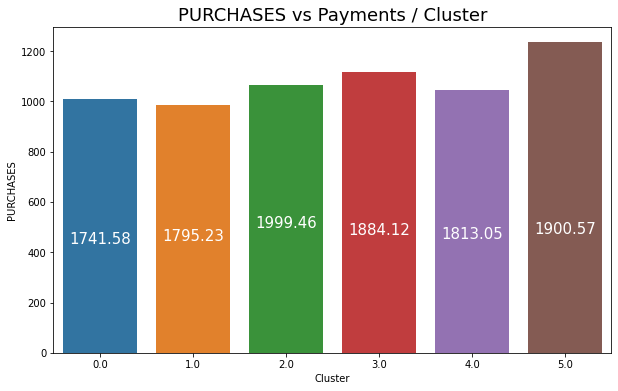

In [33]:
plt.figure(figsize=(10,6))
clusters=new_df.groupby('Cluster').apply(call_mean)

bar=sns.barplot( x='Cluster', y="PURCHASES", data=new_df, ci=False)
for i in range(len(clusters)):
    bar.text(i,clusters[i]/4,str(round(clusters[i],2)),fontdict=dict(color='white',fontsize=15),horizontalalignment='center')

plt.title("PURCHASES vs Payments / Cluster", size=18)

#### les groupes qui ont tendance à recourir au avances de fonds sont les personnes qui ont les dépenses les plus éleves (groupe 2) 

Text(0.5, 1.0, 'CASH_ADVANCE vs Payments / Cluster')

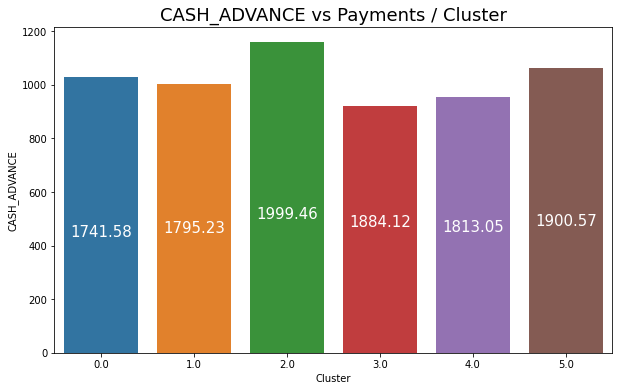

In [34]:
plt.figure(figsize=(10,6))
clusters=new_df.groupby('Cluster').apply(call_mean)

bar=sns.barplot( x='Cluster', y="CASH_ADVANCE", data=new_df, ci=False)
for i in range(len(clusters)):
    bar.text(i,clusters[i]/4,str(round(clusters[i],2)),fontdict=dict(color='white',fontsize=15),horizontalalignment='center')

plt.title("CASH_ADVANCE vs Payments / Cluster", size=18)